There is so much depth, we can spend entire life for this, it is also base for other models!

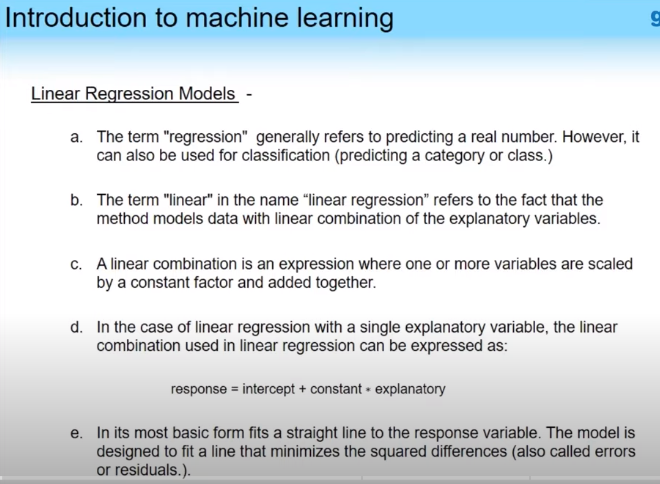

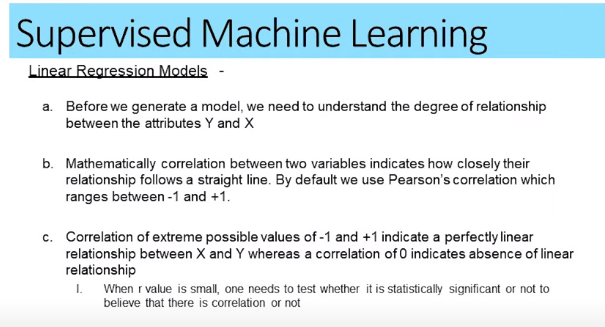

CarPrice-Linear Regresssion

In [93]:
# Hands on now:, the data used here is not data from the url, it's simpler, let us start with simpler one

In [33]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [34]:
import pandas as pd
import numpy as np
# Impart linear regression machine learning library
from sklearn.linear_model import LinearRegression # we can have linear classifiers also

In [94]:
car_df = pd.read_csv('F:\\sem9\\CL688_AI in Process Engineering\\2021_Learning\\Py_ML\\imports-85.csv', names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']) 

In [95]:
car_df.head(2).transpose()

,0,1
symboling,3,3
normalized_losses,?,?
make,alfa-romero,alfa-romero
fuel_type,gas,gas
aspiration,std,std
num_of_doors,two,two
body_style,convertible,convertible
drive_wheels,rwd,rwd
engine_location,front,front
wheel_base,88.6,88.6


In [96]:
car_df.dtypes # Object means strings

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

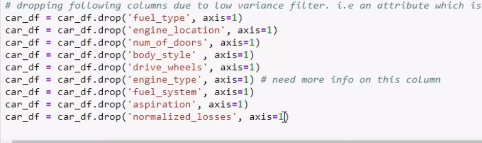

In [97]:
car_df = car_df.drop('make', axis=1) # dropping make here but in real project, may separate data based on make.
# The different makes in some data set may no be good idea
# dropping following coulmns due to low varaince filter. i.e. an attribure which is mostly one type of data is not a good dimension

car_df = car_df.drop('fuel_type', axis=1) # most of them gas
car_df = car_df.drop('engine_location', axis=1) # most of them front
car_df = car_df.drop('num_of_doors', axis=1)
car_df = car_df.drop('body_style', axis=1)
car_df = car_df.drop('drive_wheels', axis=1)
car_df = car_df.drop('engine_type', axis=1)
car_df = car_df.drop('fuel_system', axis=1)
car_df = car_df.drop('aspiration', axis=1)
car_df = car_df.drop('normalized_losses', axis=1) # time at 4:06:01


In [98]:
# Check structure of the dataframe after dropping the unwanted coulmns
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [99]:
# replace the string numbers into numerical data types for num-of-cylinders
car_df['cylinder'] = car_df['num_of_cylinders'].replace({'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8, 'nine':9, 'ten':10, 'eleven':11, 'twelve':12})

In [100]:
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
cylinder               int64
dtype: object

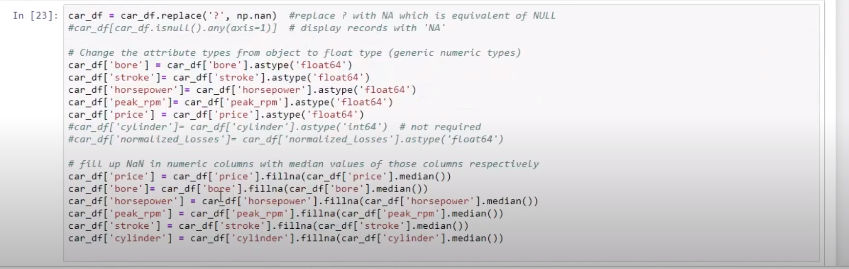

In [102]:
car_df = car_df.replace('?', np.nan)
car_df['bore'] = car_df['bore'].astype('float64')
car_df['stroke'] = car_df['stroke'].astype('float64')
car_df['horsepower'] = car_df['horsepower'].astype('float64')
car_df['peak_rpm'] = car_df['peak_rpm'].astype('float64')
car_df['price'] = car_df['price'].astype('float64')

# filling up nan values with median, we do not replace them wiwth mean because mean is sensitive to outliers! and median is not! and median also exists for object data types!
car_df['price']=car_df['price'].fillna(car_df['price'].median())
car_df['bore']=car_df['bore'].fillna(car_df['bore'].median())
car_df['horsepower']=car_df['horsepower'].fillna(car_df['horsepower'].median())
car_df['peak_rpm']=car_df['peak_rpm'].fillna(car_df['peak_rpm'].median())
car_df['stroke']=car_df['stroke'].fillna(car_df['stroke'].median())
car_df['cylinder']=car_df['cylinder'].fillna(car_df['cylinder'].median())


In [103]:
# now looking distribution of the data on various attributes!, Look for outliers!

car_df.describe().transpose() # First we should look at is difference between mean and median!
# Left hand tail is min - first quartile (25%)
# Left hand tail and right hand tail similar? for symmetrical bell curve

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17
compression_ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


C:\Users\Ravi Lakshay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


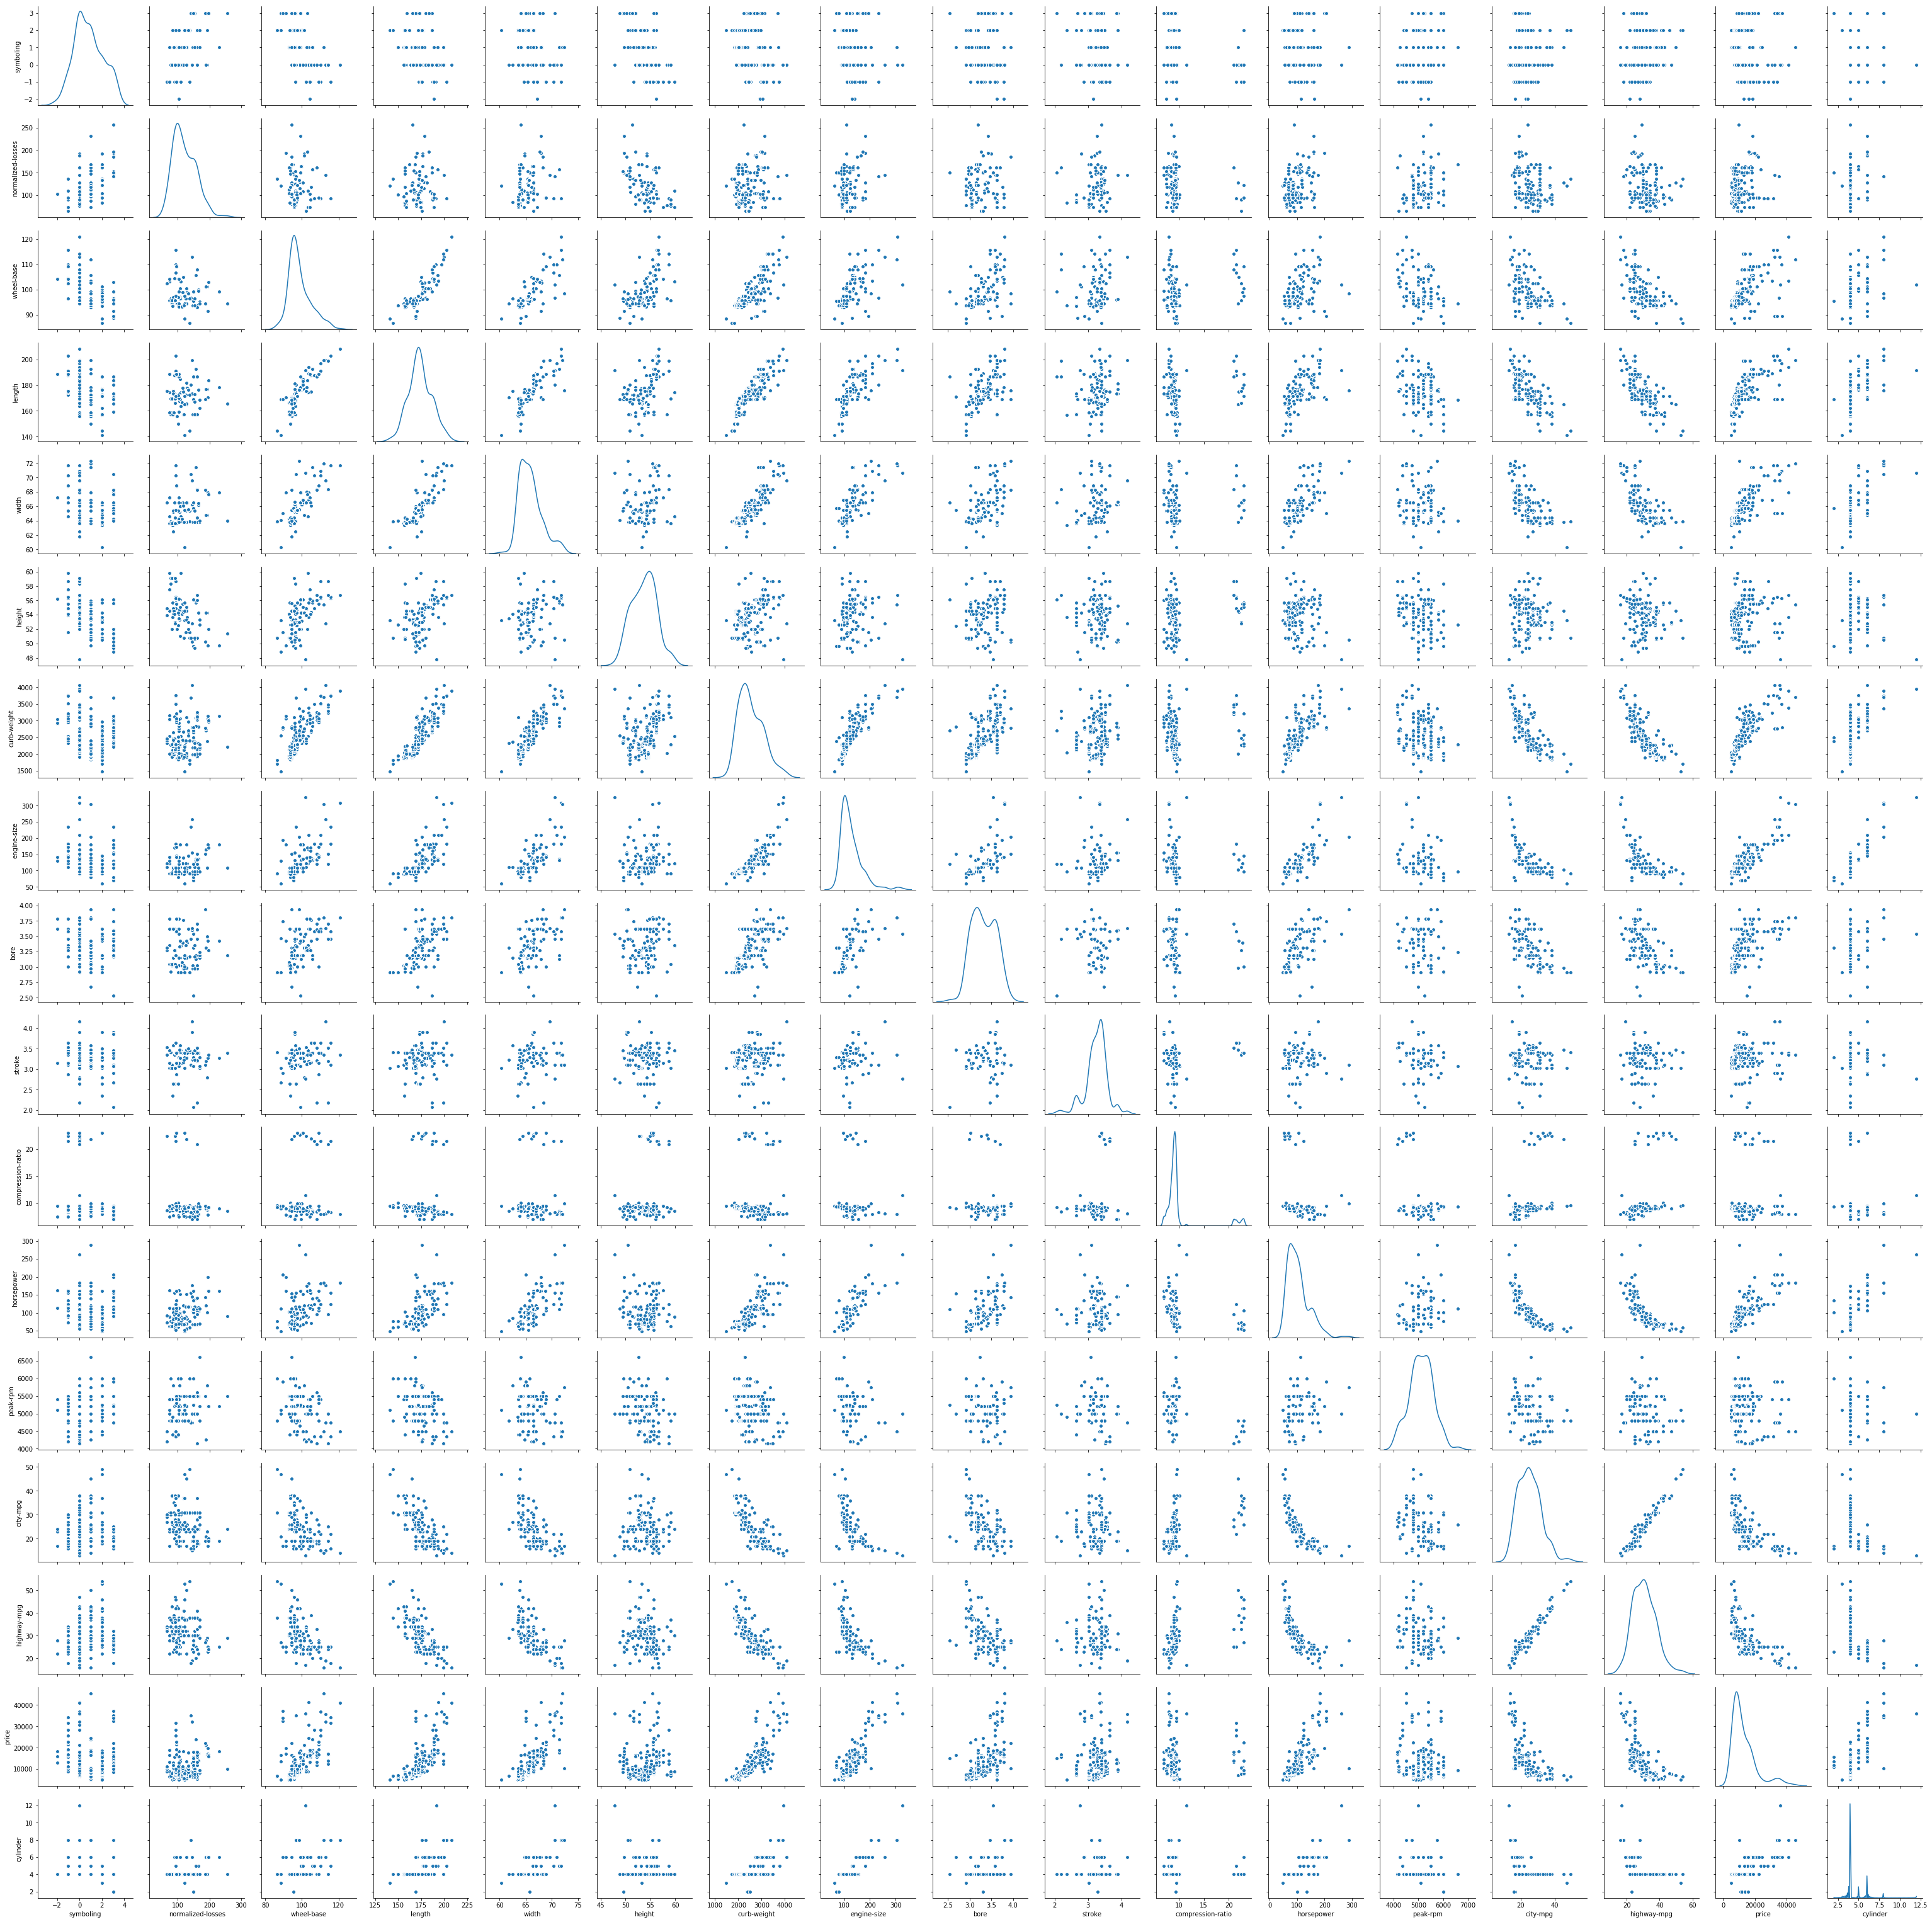

In [63]:
# importing seaborn for statistical plots
import seaborn as sns
car_df_attr = car_df.iloc[:, 1:16]

#sns.pairplot(car_df_attr, diag_kind = 'kde') # I prefer diagonals in form of density graphs!, I do this by'kde'- kernel density estimates

sns.pairplot(car_df, diag_kind = 'kde') # using a kernel function, it is estimating the density distribution in the population using this distribution!
# so the spread is the estimate of the distribution density in the population based on this data set!, it can also be for integral values

 When we build a model we should not mix gaussians!
 Two different distributionsm indicate two different processes!
 If central are too far away from each other, likely the two data sets are not from the same source!, in that case how can we include them in one single model?!
 What is model? A model is predicting the behaviour of the source, the process which is generating the data!
 My hunch or experience tells me that this is typo and not data coming from different sources!- In comression-ratio
 GO and put 1.96 std deviation limit to detect outliers!

In [104]:
car_df.dtypes 

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
cylinder               int64
peak_-rpm            float64
dtype: object

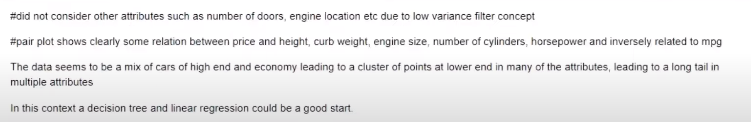

In [105]:
# Copy all the predictor variables into X dataframe, Since 'mgp' is dependent variable drop it

X = car_df.drop('price', axis=1)
X = X.drop('num_of_cylinders', axis=1)

y = car_df[['price']] # or y = car_df['price']

In [106]:
X.dtypes 

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
cylinder               int64
peak_-rpm            float64
dtype: object

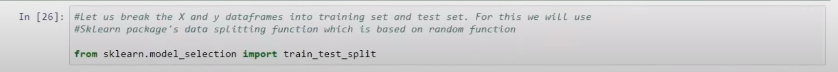

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
# split training set X and y into training and test set in the ration 75:25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    

In [109]:
# invoke LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression() # This is where a class becomes an object
regression_model.fit(X_train, y_train) # ⌚ @ 4:58:00

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [110]:
# let us explore cofficients for each independent attribute: OR cofficients of the hyper plane

for idx, col_name in enumerate(X_train.columns):
    print("The cofficient of {} is {}".format(col_name, regression_model.coef_[0][idx]))

The cofficient of symboling is 88.5779490097285
The cofficient of wheel_base is 71.8240276093505
The cofficient of length is -93.38447872011952
The cofficient of width is 479.8164355926811
The cofficient of height is 315.20384001211914
The cofficient of curb_weight is -0.8657326891347917
The cofficient of engine_size is 251.74362582792082
The cofficient of bore is -6832.550987635437
The cofficient of stroke is -5085.818859790598
The cofficient of compression_ratio is 335.7682519296432
The cofficient of horsepower is -0.03898796131230944
The cofficient of peak_rpm is 1.215024746767925
The cofficient of city_mpg is -201.81713200347332
The cofficient of highway_mpg is -41.93431935731798
The cofficient of cylinder is -3176.1760903729687
The cofficient of peak_-rpm is 1.2150247468147923


In [111]:
""""# Root causes
1. we have not handeled the outliers
2. we hv not done anything to handle multi colinearity
These are the core reasons leading to model level problems! which we will see across all data sets!

"""

'"# Root causes\n1. we have not handeled the outliers\n2. we hv not done anything to handle multi colinearity\nThese are the core reasons leading to model level problems! which we will see across all data sets!\n\n'

In [112]:
intercept = regression_model.intercept_[0] # we do not know name of array, we access intercept using this function
intercept

-12323.060174572438

In [113]:
# 5:08:55 Now 83.6 % is performance of model on test data, 86.3% of total variance in your test data has been captured by your model.
# this is not adj R^2 but R^2, 86.3% is coff. of determent

In [114]:
# Now we need to improve performance of the model, our fist cut model will not be accurate its very rare!

In [115]:
# R^2=1-RSS / TSS

regression_model.score(X_test, y_test)

0.8362176483290393

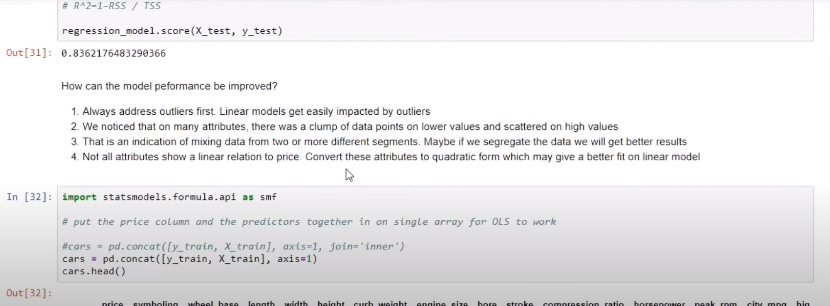

In [116]:
# When we build this model in R, R gives a lot of statistical atributes abt ur models
# Scikitlearn linearregression does not give u these info
# so we import smf - statistical model functions

In [124]:
import statsmodels.formula.api as smf

# put the price column and the predictors together in a single array for OLS to work (Ordinary least squares)
# cars = pd.concat([y_train, X_train], axis=1, join ='inner')
cars = pd.concat([y_train, X_train], axis=1)
cars.head(5)

,price,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,cylinder,peak_-rpm
14,24565.0,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121.0,4250.0,20,25,6,4250.0
162,9258.0,0,95.7,166.3,64.4,52.8,2140,98,3.19,3.03,9.0,70.0,4800.0,28,34,4,4800.0
59,8845.0,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84.0,4800.0,26,32,4,4800.0
19,6295.0,1,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,4,5400.0
177,11248.0,-1,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92.0,4200.0,27,32,4,4200.0


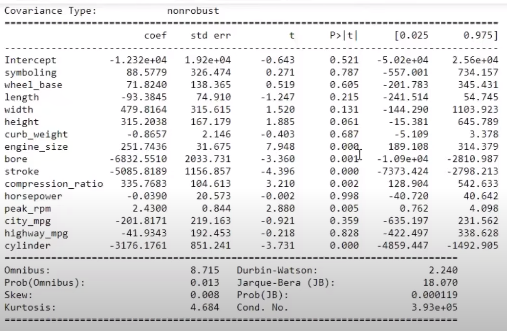

In [118]:
# we rebuild the model using this cars (Where the independent and target variable put together, this is done for R programming)

In [126]:
cars.head()

,price,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,cylinder,peak_-rpm
14,24565.0,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121.0,4250.0,20,25,6,4250.0
162,9258.0,0,95.7,166.3,64.4,52.8,2140,98,3.19,3.03,9.0,70.0,4800.0,28,34,4,4800.0
59,8845.0,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84.0,4800.0,26,32,4,4800.0
19,6295.0,1,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43,4,5400.0
177,11248.0,-1,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92.0,4200.0,27,32,4,4200.0


In [127]:
ols = smf.ols( formula = "price ~ symboling + wheel_base + length + height + curb_weight + engine_size + bore + stroke + compression_ratio + horsepower + peak_rpm + city_mpg + highway_mpg + cylinder", data=cars).fit()

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     44.23
Date:                Sat, 27 Mar 2021   Prob (F-statistic):           5.94e-44
Time:                        21:32:28   Log-Likelihood:                -1456.9
No. Observations:                 153   AIC:                             2944.
Df Residuals:                     138   BIC:                             2989.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3359.6091   1.62e+04      0.207      0.836   -2.87e+04    3.54e+04
symboling           222.5530    315.844      0.705      0.482    -401.967     847.073
wheel_base          156.6617    127.212      1.231      0.220     -94.876     408.199
length              -68.1562     73.395     -0.929      0.355    -213.281      76.968
height              260.8949    164.092      1.590      0.114     -63.564     585.354
curb_weight          -0.1799      2.108     -0.085      0.932      -4.348       3.988
engine_size         241.4502     31.090      7.766      0.000     179.976     302.924
bore              -6315.6280   2014.608     -3.135      0.002   -1.03e+04   -2332.136
stroke            -4811.6837   1148.133     -4.191      0.000   -7081.892   -2541.476
compression_ratio   335.6852    105.108      3.194      0.002     127.854     543.517
horsepower            3.7740     20.516      0.184      0.854     -36.793      44.341
peak_rpm              2.5232      0.845      2.984      0.003       0.851       4.195
city_mpg           -187.6378    220.002     -0.853      0.395    -622.649     247.373
highway_mpg         -33.1217    193.277     -0.171      0.864    -415.289     349.046
cylinder          -2848.5610    827.415     -3.443      0.001   -4484.612   -1212.510
==============================================================================
Omnibus:                        6.515   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.856
Skew:                           0.048   Prob(JB):                      0.00439
Kurtosis:                       4.301   Cond. No.                     3.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# those values where p value < 0.05 a good attribute! if p value > 0.05 the useless!!, a statistical fluke!